# Igor Duarte Milanez Vieira
# Giulia Duncan da Silva
# Matheus Viviani Falcao

# Parkinson Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time

In [2]:
%matplotlib inline 
plt.rc('font', family='Arial')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
dfParkinson = pd.read_csv(url)
print(dfParkinson.shape)
print(dfParkinson.columns)
dfParkinson.head()

(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
dfParkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
outcome_column = 'status'
# status: 0: healthy, 1: Parkinson's
outcome_labels = {0: 'healthy', 1:'Parkinson`s'}
label_counts = np.bincount(dfParkinson.status)
x = range(len(outcome_labels))
y = list(label_counts)
print("Healthy quantity: ", y[0])
print("Parkinson`s quantity: ", y[1])

Healthy quantity:  48
Parkinson`s quantity:  147


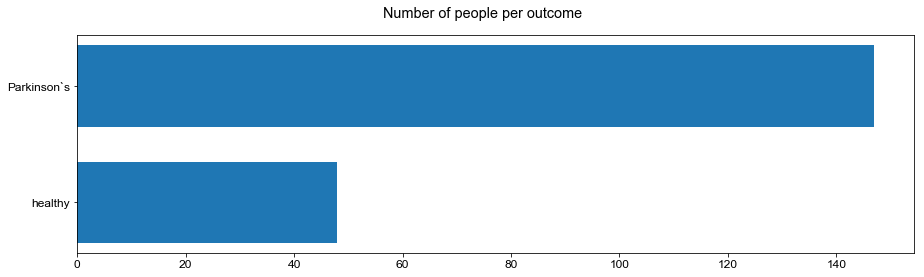

In [6]:
fig = plt.figure(figsize=(15,4))
plt.barh(x, y, height=0.7)
plt.yticks(x, outcome_labels.values())
fig.suptitle('Number of people per outcome')
plt.show()

In [7]:
features = [col for col in dfParkinson.columns if col not in ['name', 'status']]
features

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [8]:
# convert feature dataframe and label series to arrays
X = np.array(dfParkinson[features])
print(X[0, :])

Y = np.array(dfParkinson[outcome_column])
print(Y)

[ 1.199920e+02  1.573020e+02  7.499700e+01  7.840000e-03  7.000000e-05
  3.700000e-03  5.540000e-03  1.109000e-02  4.374000e-02  4.260000e-01
  2.182000e-02  3.130000e-02  2.971000e-02  6.545000e-02  2.211000e-02
  2.103300e+01  4.147830e-01  8.152850e-01 -4.813031e+00  2.664820e-01
  2.301442e+00  2.846540e-01]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [9]:
from sklearn.model_selection import train_test_split

# separando dados de treino e de teste (20% de teste)
dfTrain, dfTest = train_test_split(dfParkinson, test_size=0.2, 
                                   stratify=dfParkinson[outcome_column])

# convertemos dataframe de features e labels em arrays
X_train = np.array(dfTrain[features])
Y_train = np.array(dfTrain[outcome_column])
print("Dados de treino: ", X_train.shape[0], Y_train.shape[0])

# convertemos dataframe de features e labels em arrays
X_test = np.array(dfTest[features])
Y_test = np.array(dfTest[outcome_column])

# Imprimimos as dimensões das massas de teste
print("Dados de teste: ", X_test.shape[0], Y_test.shape[0])

Dados de treino:  156 156
Dados de teste:  39 39


In [10]:
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics

# Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=2)

# Train the classifier with the train data
knn_model.fit(X_train,Y_train)

# Compute the prediction over the test data set according to the model
Yhat = knn_model.predict(X_test)

In [11]:
accuracy_train = knn_model.score(X_train, Y_train)
print('accuracy in training data:', '{:6.4f}'.format(accuracy_train))
accuracy_test = knn_model.score(X_test, Y_test)
print('accuracy in test data:    ', '{:6.4f}'.format(accuracy_test))

accuracy in training data: 0.9038
accuracy in test data:     0.7179


In [12]:
dfParkinson.set_index(['name'], inplace=True)
np.random.seed(1001001)

def eval_k_means(estimator, name, data, k):
    t0 = time()
    estimator.fit(data)
    print('%-10s, k=%d: sil=%0.4f' % (name, k, metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

# standardize data
data = scale(dfParkinson)

#
sample_size=150

# 
best_sil = -999

for init in ['k-means++', 'random']:
    for k in range(3,8):
        estimator = KMeans(init=init, n_clusters=k, n_init=10, max_iter=100)
        estimator.fit(data)
        sil = metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)
        print('%-10s, k=%d: sil=%0.4f' % (init, k, sil))
        if sil > best_sil:
            best_estimator = estimator
            best_sil = sil

print('better estimator silhouette: %0.4f (%d clusters, %s)' % (best_sil, best_estimator.n_clusters, best_estimator.init))
dfParkinson['label'] = best_estimator.labels_

k-means++ , k=3: sil=0.2794
k-means++ , k=4: sil=0.2300
k-means++ , k=5: sil=0.2203
k-means++ , k=6: sil=0.2437
k-means++ , k=7: sil=0.2298

E:\Users\igor_\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if sys.path[0] == '':



random    , k=3: sil=0.2694
random    , k=4: sil=0.2306
random    , k=5: sil=0.2210
random    , k=6: sil=0.2143
random    , k=7: sil=0.2208
better estimator silhouette: 0.2794 (3 clusters, k-means++)


E:\Users\igor_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Users\igor_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


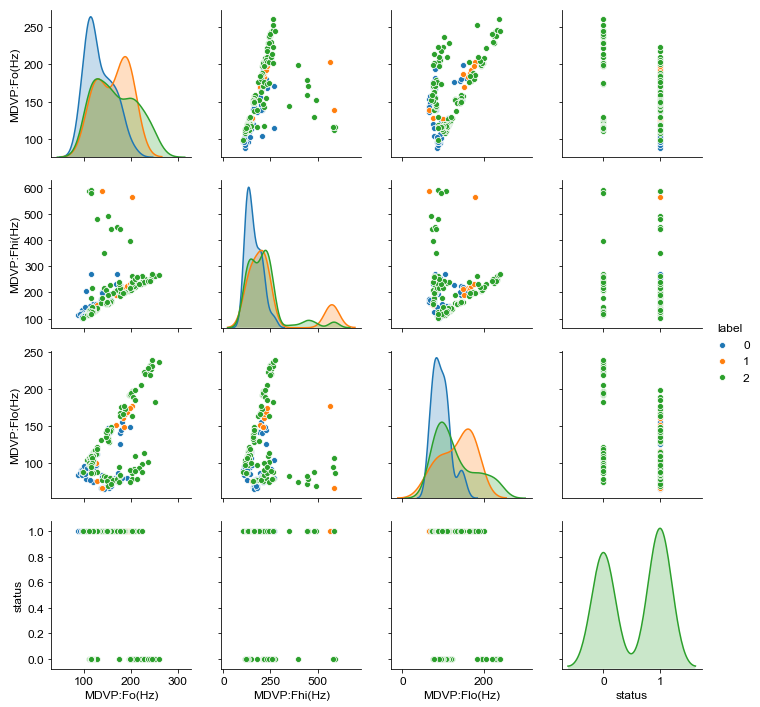

In [13]:
sns.pairplot(data=dfParkinson, vars=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','status'], hue='label')
plt.show()

In [14]:
from sklearn import datasets
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

def fit_kmeans(df, k):
    X,y = df
    model = KMeans(init='random', n_clusters=k, n_init=10, max_iter=100)
    labels = model.fit_predict(X,y)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    df1['label'] = labels
    return df1

def fit_agglomerative(df, k):
    X,y = df
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)    
    model = AgglomerativeClustering(n_clusters=k, linkage="average", affinity="cityblock", connectivity=connectivity)
    labels = model.fit_predict(X,y)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    df1['label'] = labels
    return df1

def fit_spectral(df, k):
    X,y = df
    model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = model.fit_predict(X,y)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    df1['label'] = labels
    return df1

    
n_samples = 1500

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=4)

dfS1 = fit_spectral(noisy_circles, k=3)
dfS2 = fit_spectral(noisy_moons, k=3)
dfS3 = fit_spectral(blobs, k=3)

dfK1 = fit_kmeans(noisy_circles, k=3)
dfK2 = fit_kmeans(noisy_moons, k=3)
dfK3 = fit_kmeans(blobs, k=3)

dfA1 = fit_agglomerative(noisy_circles, k=3)
dfA2 = fit_agglomerative(noisy_moons, k=3)
dfA3 = fit_agglomerative(blobs, k=3)

E:\Users\igor_\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
E:\Users\igor_\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
E:\Users\igor_\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
E:\Users\igor_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:480: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
E:\Users\igor_\Anaconda3\lib\site-pac

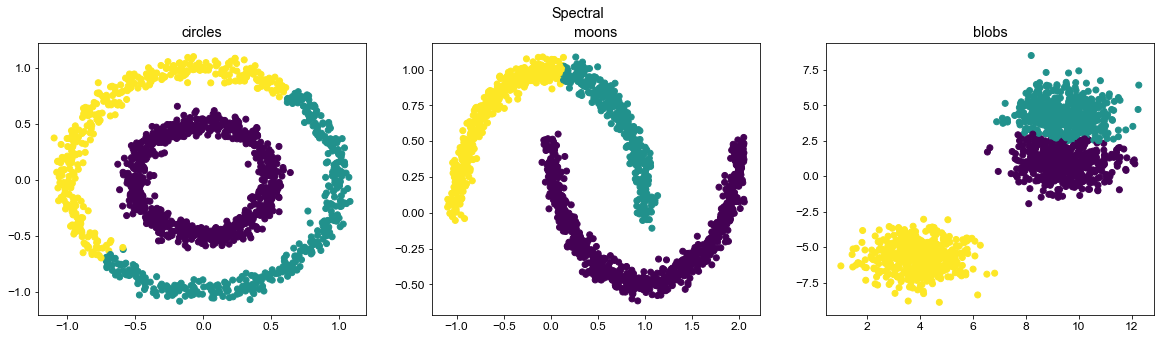

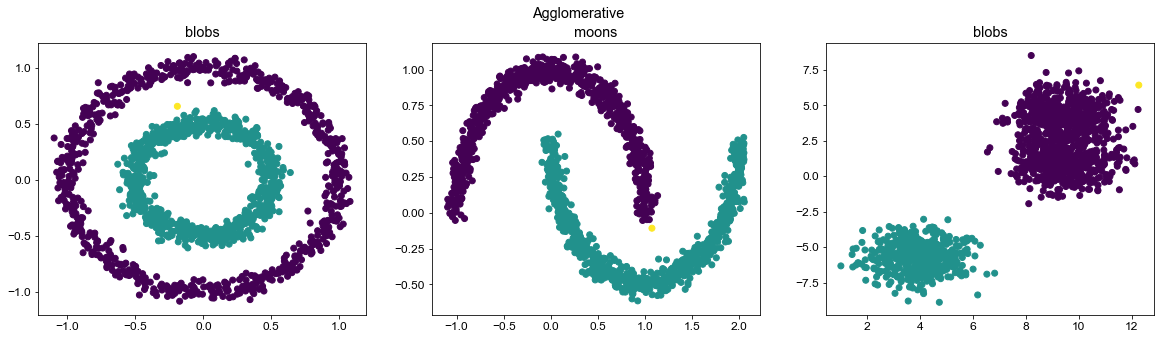

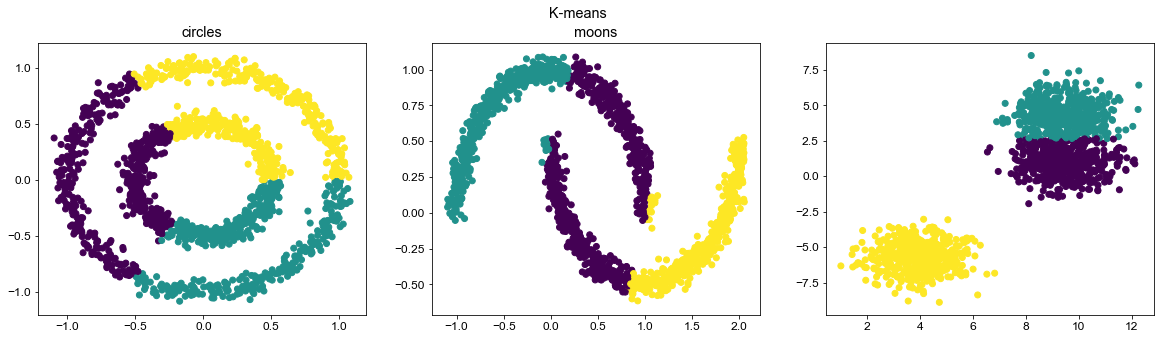

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax1.scatter(dfS1[0], dfS1[1], c=dfS1.label)
ax1.set_title('circles')
ax2.scatter(dfS2[0], dfS2[1], c=dfS2.label)
ax2.set_title('moons')
ax3.scatter(dfS3[0], dfS3[1], c=dfS3.label)
ax3.set_title('blobs')
plt.suptitle('Spectral', y=0.98)

fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax4.scatter(dfA1[0], dfA1[1], c=dfA1.label)
ax4.set_title('circles')
ax5.scatter(dfA2[0], dfA2[1], c=dfA2.label)
ax5.set_title('moons')
ax6.scatter(dfA3[0], dfA3[1], c=dfA3.label)
ax6.set_title('blobs')
plt.suptitle('Agglomerative', y=0.98)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax1.scatter(dfK1[0], dfK1[1], c=dfK1.label)
ax1.set_title('circles')
ax2.scatter(dfK2[0], dfK2[1], c=dfK2.label)
ax2.set_title('moons')
ax3.scatter(dfK3[0], dfK3[1], c=dfK3.label)
ax4.set_title('blobs')
plt.suptitle('K-means', y=0.98)
plt.show()